## Varying debye lengths

LF_DEM executables at 'home/3780/opt/' (darwin cluster)
LF_DEM : \lambda = 0.05 as 
LF_DEM2: \lambda = 0.1  as
LF_DEM3: \lambda = 0.01 as

In [23]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib
import os
import random
from matplotlib.lines import Line2D
import colorsys
from matplotlib import colors  

# Matplotlib rc parameters modification

plt.rcParams.update({
  "figure.max_open_warning" : 0,
  "text.usetex"             : True,
  "text.latex.preamble"     : r"\usepackage{amsmath, bm, type1cm}",  # Added \bm for bold math
  "figure.autolayout"       : True,
  "font.family"             : "STIXGeneral",
  "mathtext.fontset"        : "stix",
  "font.size"               : 8,
  "xtick.labelsize"         : 8,
  "ytick.labelsize"         : 8,
  "lines.linewidth"         : 1,
  "lines.markersize"        : 5,
})
#plt.rcParams['text.latex.preamble']= r"\usepackage{amsmath}"
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble'] = r'\boldmath'

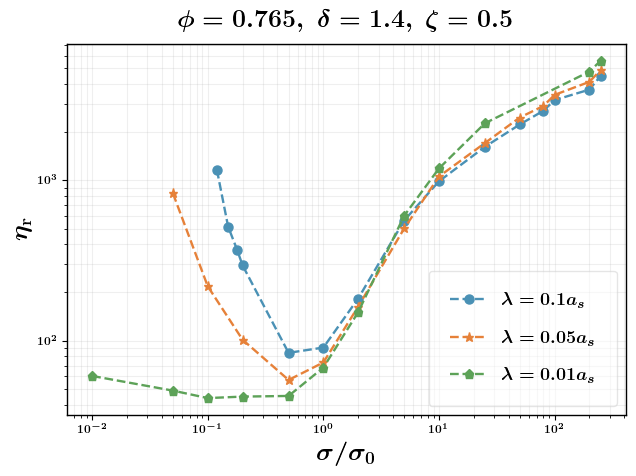

In [33]:
## flow curve (for new data)

## phi/phim = 0.97

npp = 1000
vr  = '0.5'
phi = 0.765
ar  = 1.4
off = 100
numRun   = 1
stress   = ['0.01', '0.05', '0.1', '0.12', '0.15', '0.18', '0.2', '0.5', 
            '1', '2','5', '10', '25', '50', '80', '100', '200', '250']
stress1  = [float(s) for s in stress]
debyelen = ['0.1', '0.05', '0.01']
markers  = ['o', '*', 'p', 's']
colors   = ['#4a91b5', '#e68139', '#5da258', '#87629b']

#linux
topDir        = '/home/rahul/mnt/sshfs_darwin/debye/'
fig_save_path = '/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/flowcurves/'

#mac
#topDir = "/Volumes/rahul_2TB/high_bidispersity/new_data/flow_curves"
#fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/conferences/GSOE_poster/figures/'

for j, dlj in enumerate(debyelen):
    visc     = [np.nan for _ in stress1]
    visc_std = [np.nan for _ in stress1]
    for s in range(len(stress)):
        workDir = f'{topDir}{dlj}as/stress_{stress[s]}r/NP_{npp}/phi_{phi}/ar_{ar}/Vr_{vr}/run_{numRun}'
        if os.path.exists(workDir):
            file_name = glob.glob(f'{workDir}/data_*.dat')[0]
            with open(f'{file_name}','r') as file:
                data_array = np.loadtxt(file)  # Load all data into a 2D array
                if data_array.ndim != 1:
                    strain = data_array[:, 1]
                    data   = data_array[:, 3][off:]
                
                    if len(data) > 0 and all(data >= 0):
                        visc[s]     = np.mean(data)
                        visc_std[s] = np.std(data)
                    else:
                        visc[s] = visc_std[s] = np.nan
                else:
                    visc[s] = visc_std[s] = np.nan
                    
    visc_plot     = [i for i in visc if not np.isnan(i)]
    visc_err_plot = [i for i in visc_std if not np.isnan(i)]
    stress_plot   = [stress1[i] for i in range(len(stress1)) if not np.isnan(visc[i])]
    plt.plot(stress_plot, visc_plot, linestyle='--', 
             marker=markers[j], label=fr'$\lambda = {dlj} a_{{s}}$', 
             color=colors[j], linewidth=1.7, markersize=6.5)
    
ax = plt.gca()
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

plt.grid(which='both', alpha=0.2)

plt.xlabel(r'$\mathbf{\sigma/\sigma_{0}}$', fontsize=18, fontweight='bold', style='italic')
plt.ylabel(r'$\mathbf{\eta_r}$', fontsize=18, fontweight='bold', style='italic')
plt.title(fr'$\phi = {phi}, \; \delta = {ar}, \; \zeta = {vr}$', fontsize=18, fontweight='bold',  pad=12)
plt.legend(loc='lower right', fontsize=13, labelspacing=1.2,borderpad=1.2,framealpha=0.5)

plt.xscale('log')
plt.yscale('log')

#plt.xticks([0.1, 1, 10, 100], [r'$10^{-1}$', r'$10^{0}$', r'$10^{1}$', r'$10^{2}$'], fontsize=14, fontweight='bold')
#plt.yticks([100, 1000, 10000], [r'$10^{2}$', r'$10^{3}$', r'$10^{4}$'], fontsize=14, fontweight='bold')

#plt.tight_layout()

if True:
    figFormat=".svg"
    plt.savefig(fig_save_path+ "flowcurve_debye_stress"+figFormat, bbox_inches="tight",dpi=600, transparent=False)

plt.show()

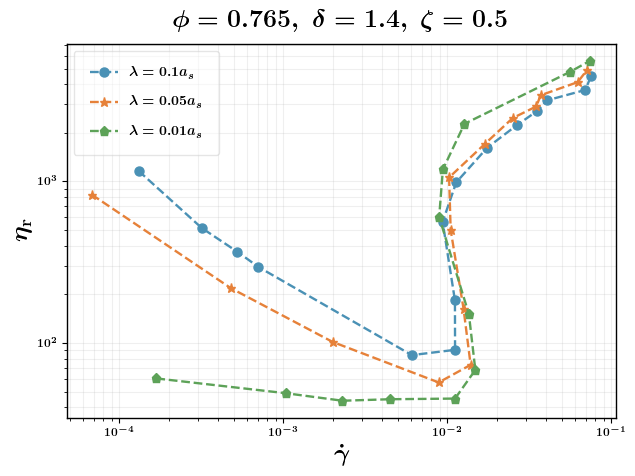

In [34]:
## flow curve (for new data)

## phi/phim = 0.97

npp = 1000
vr  = '0.5'
phi = 0.765
ar  = 1.4
off = 100
numRun   = 1
stress   = ['0.01', '0.05', '0.1', '0.12', '0.15', '0.18', '0.2', '0.5', 
            '1', '2','5', '10', '25', '50', '80', '100', '200', '250']
stress1  = [float(s) for s in stress]
debyelen = ['0.1', '0.05', '0.01']
markers  = ['o', '*', 'p', 's']
colors   = ['#4a91b5', '#e68139', '#5da258', '#87629b']

#linux
topDir        = '/home/rahul/mnt/sshfs_darwin/debye/'
fig_save_path = '/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/flowcurves/'

#mac
#topDir = "/Volumes/rahul_2TB/high_bidispersity/new_data/flow_curves"
#fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/conferences/GSOE_poster/figures/'

for j, dlj in enumerate(debyelen):
    visc      = [np.nan for _ in stress1]
    visc_std  = [np.nan for _ in stress1]

    srate     = [np.nan for _ in stress1]
    srate_std = [np.nan for _ in stress1]
    
    for s in range(len(stress)):
        workDir = f'{topDir}{dlj}as/stress_{stress[s]}r/NP_{npp}/phi_{phi}/ar_{ar}/Vr_{vr}/run_{numRun}'
        if os.path.exists(workDir):
            file_name = glob.glob(f'{workDir}/data_*.dat')[0]
            with open(f'{file_name}','r') as file:
                data_array = np.loadtxt(file)  # Load all data into a 2D array
                if data_array.ndim != 1:
                    strain = data_array[:, 1]
                    srated = data_array[:, 2][off:]
                    data   = data_array[:, 3][off:]
                
                    if len(data) > 0 and all(data >= 0):
                        visc[s]      = np.mean(data)
                        visc_std[s]  = np.std(data)

                        srate[s]     = np.mean(srated)
                        srate_std[s] = np.std(srated)
                    else:
                        visc[s] = visc_std[s] = np.nan
                        srate[s] = srate_std[s] = np.nan
                else:
                    visc[s] = visc_std[s] = np.nan
                    srate[s] = srate_std[s] = np.nan
                    
    visc_plot     = [i for i in visc if not np.isnan(i)]
    visc_err_plot = [i for i in visc_std if not np.isnan(i)]
    stress_plot   = [stress1[i] for i in range(len(stress1)) if not np.isnan(visc[i])]
    rate_plot     = [i for i in srate if not np.isnan(i)]
    
    plt.plot(rate_plot, visc_plot, linestyle='--', 
             marker=markers[j], label=fr'$\lambda = {dlj} a_{{s}}$', 
             color=colors[j], linewidth=1.7, markersize=6.5)
    
ax = plt.gca()
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

plt.grid(which='both', alpha=0.2)

plt.xlabel(r'$\mathbf{\dot\gamma}$', fontsize=18, fontweight='bold', style='italic')
plt.ylabel(r'$\mathbf{\eta_r}$', fontsize=18, fontweight='bold', style='italic')
plt.title(fr'$\phi = {phi}, \; \delta = {ar}, \; \zeta = {vr}$', fontsize=18, fontweight='bold',  pad=12)
plt.legend(loc='upper left', fontsize=10, labelspacing=1.2,borderpad=1.2,framealpha=0.5)

plt.xscale('log')
plt.yscale('log')

#plt.xticks([0.1, 1, 10, 100], [r'$10^{-1}$', r'$10^{0}$', r'$10^{1}$', r'$10^{2}$'], fontsize=14, fontweight='bold')
#plt.yticks([100, 1000, 10000], [r'$10^{2}$', r'$10^{3}$', r'$10^{4}$'], fontsize=14, fontweight='bold')

#plt.tight_layout()

if True:
    figFormat=".svg"
    plt.savefig(fig_save_path+ "flowcurve_debye_srate"+figFormat, bbox_inches="tight",dpi=600, transparent=False)

plt.show()